## Import Modules

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Load the Dataset

In [12]:
TRAIN_DIR = 'E:/BE/Sem-8/Project1/images/train/'
TEST_DIR = 'E:/BE/Sem-8/Project1/images/validation/'

In [13]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [4]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

Angry Completed
Disgust Completed
Fear Completed
Happy Completed
Neutral Completed
Sad Completed
Surprise Completed


,image,label
0,E:/BE/Sem-8/Project1/images/train/Sad\19353.jpg,Sad
1,E:/BE/Sem-8/Project1/images/train/Sad\899.jpg,Sad
2,E:/BE/Sem-8/Project1/images/train/Angry\20827.jpg,Angry
3,E:/BE/Sem-8/Project1/images/train/Angry\26490.jpg,Angry
4,E:/BE/Sem-8/Project1/images/train/Surprise\267...,Surprise


In [14]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

Angry Completed
Disgust Completed
Fear Completed
Happy Completed
Neutral Completed
Sad Completed
Surprise Completed


,image,label
0,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry
1,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry
2,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry
3,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry
4,E:/BE/Sem-8/Project1/images/validation/Angry\1...,Angry


## Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

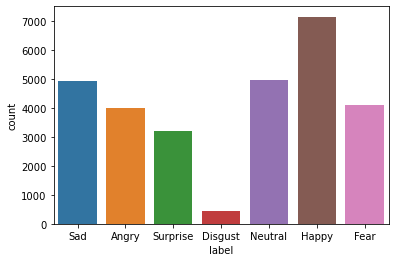

In [6]:
sns.countplot(train['label'])

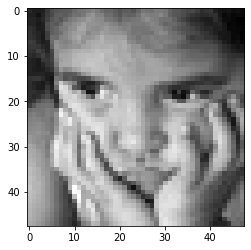

In [7]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

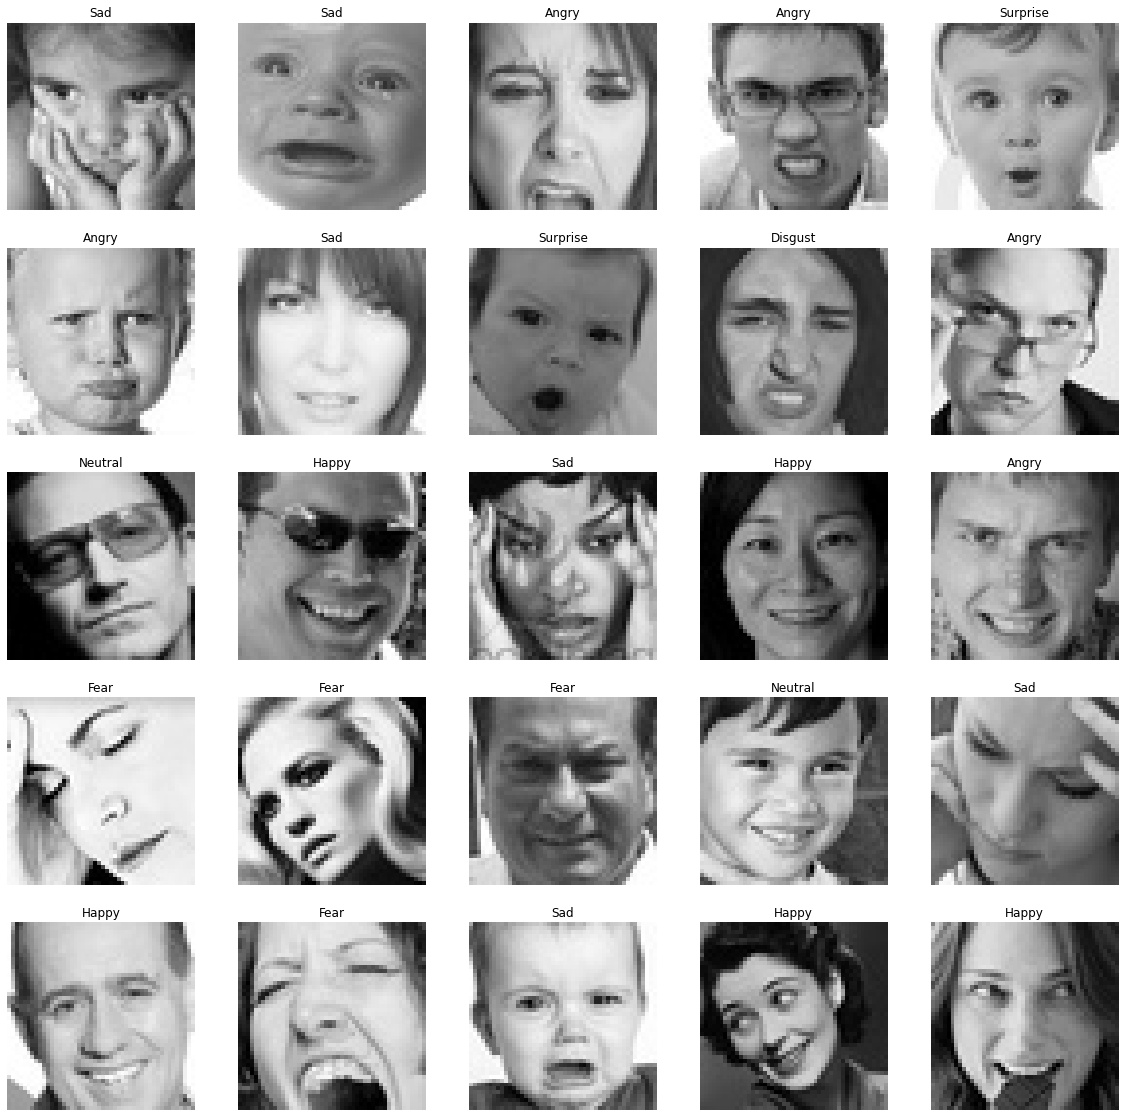

In [8]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [10]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [14]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [16]:
# config
input_shape = (48, 48, 1)
output_class = 7

## Model Creation

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [18]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 565s 2s/step - loss: 1.8217 - accuracy: 0.2447 - val_loss: 1.7998 - val_accuracy: 0.2611
Epoch 2/100
226/226 [==============================] - 618s 3s/step - loss: 1.7617 - accuracy: 0.2687 - val_loss: 1.6792 - val_accuracy: 0.3123
Epoch 3/100
226/226 [==============================] - 620s 3s/step - loss: 1.6159 - accuracy: 0.3508 - val_loss: 1.4603 - val_accuracy: 0.4404
Epoch 4/100
226/226 [==============================] - 603s 3s/step - loss: 1.4887 - accuracy: 0.4183 - val_loss: 1.3541 - val_accuracy: 0.4788
Epoch 5/100
226/226 [==============================] - 593s 3s/step - loss: 1.4130 - accuracy: 0.4528 - val_loss: 1.2835 - val_accuracy: 0.5064
Epoch 6/100
226/226 [==============================] - 596s 3s/step - loss: 1.3667 - accuracy: 0.4715 - val_loss: 1.2571 - val_accuracy: 0.5207
Epoch 7/100
226/226 [==============================] - 594s 3s/step - loss: 1.3343 - accuracy: 0.4844 - val_loss: 1.2351 - val_accuracy:

## Plot the Results

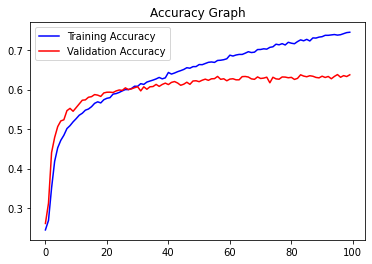

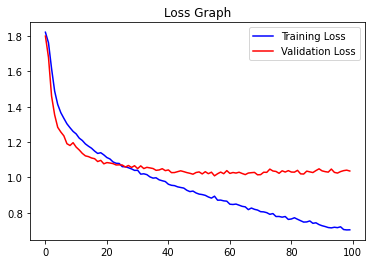

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Test with Image Data

Original Output: Happy
Predicted Output: Happy


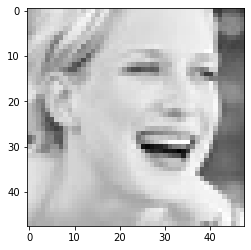

In [20]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Happy
Predicted Output: Happy


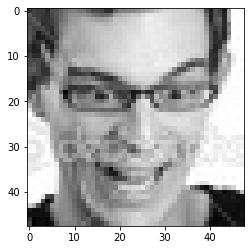

In [21]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [41]:
#Saving the model
model.save("facial_emotional_model.h5py")

INFO:tensorflow:Assets written to: facial_emotional_model.h5py\assets


In [16]:
cd E:/BE/Sem-8/Project1/

E:\BE\Sem-8\Project1


In [17]:
pwd

'E:\\BE\\Sem-8\\Project1'

In [18]:
model = keras.models.load_model('facial_emotional_model.h5py')

In [ ]:
pic='E:/BE/Sem-8/Project1/images/validation\Disgust\533.jgp'